In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [5]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [31]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
print(df.shape)
df.head()

(207, 61)


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [0]:
X = df[df.columns[0:60]].values
y = df[df.columns[60]]
# Define the encoder function
def one_hot_encode(labels):
	n_labels = len(labels)
	n_unique_labels = len(np.unique(labels))
	one_hot_encode = np.zeros((n_labels, n_unique_labels))
	one_hot_encode[np.arange(n_labels), labels] = 1
	return one_hot_encode

#Encode the dependent Variables
encoder = LabelEncoder()	
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)

In [36]:
print([X,y])
X, y = shuffle(X, y, random_state = 2)
print([X,y])

[array([[0.0086, 0.0215, 0.0242, ..., 0.005 , 0.0024, 0.003 ],
       [0.0731, 0.1249, 0.1665, ..., 0.0194, 0.0207, 0.0057],
       [0.0231, 0.0351, 0.003 , ..., 0.0038, 0.0043, 0.003 ],
       ...,
       [0.0116, 0.0744, 0.0367, ..., 0.0044, 0.0057, 0.0035],
       [0.0164, 0.0173, 0.0347, ..., 0.0035, 0.0056, 0.004 ],
       [0.0117, 0.0069, 0.0279, ..., 0.0062, 0.0026, 0.0052]]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0

In [37]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state = 4)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(165, 60)
(165, 2)
(42, 60)


In [42]:
# Define important parameters and variables to work with tensors
learning_rate = 0.3
training_epochs = 1000 
cost_history = np.empty(shape = [1], dtype = float)
n_dim = X.shape[1]
print("n_dim = ", n_dim)
n_class = 2
model_path = "Users/model" #Path to store the model

n_dim =  60


#### Multilayer perceptron

In [0]:
# Define number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class]) #Output of our model

In [0]:
# Define the weights and biases for each layer

weights = {
	'h1' : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])), #60 x 60
	'h2' : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
	'h3' : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
	'h4' : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
	'out' : tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
	'b1' : tf.Variable(tf.truncated_normal([n_hidden_1])),
	'b2' : tf.Variable(tf.truncated_normal([n_hidden_2])),
	'b3' : tf.Variable(tf.truncated_normal([n_hidden_3])),
	'b4' : tf.Variable(tf.truncated_normal([n_hidden_4])),
	'out' : tf.Variable(tf.truncated_normal([n_class]))
}


In [0]:
#Define the model

def multilayer_perceptron(x, weights, biases):

	# Hidden Layer 1 with Sigmoid Activation function
	layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
	layer_1 = tf.nn.sigmoid(layer_1)

	# Hidden Layer 2 with Sigmoid Activation function
	layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
	layer_2 = tf.nn.sigmoid(layer_2)

	# Hidden Layer 3 with Sigmoid Activation function
	layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
	layer_3 = tf.nn.sigmoid(layer_3)

	# Hidden Layer 4 with Relu Activation function
	layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
	layer_4 = tf.nn.relu(layer_4)

	# Output layer with linear activation
	out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
	return out_layer


In [0]:
# Initialize all the variables
init = tf.global_variables_initializer()

# Saver object in order to save the model
saver = tf.train.Saver() 


# Call the model Defined above
y = multilayer_perceptron(x, weights, biases)

In [0]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))

training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)


# Tensoflow Session
sess = tf.Session()
sess.run(init)

Epoch :  0  - Cost: 184.70078  - MSE:  41587.317933078055 - Train Accuracy:  0.54545456
Epoch :  1  - Cost: 3.6954277  - MSE:  16.17438551725882 - Train Accuracy:  0.45454547
Epoch :  2  - Cost: 6.8264184  - MSE:  56.01702992049162 - Train Accuracy:  0.54545456
Epoch :  3  - Cost: 0.7566718  - MSE:  0.5046421042293671 - Train Accuracy:  0.45454547
Epoch :  4  - Cost: 1.0265559  - MSE:  2.1131175522707863 - Train Accuracy:  0.54545456
Epoch :  5  - Cost: 1.0995107  - MSE:  1.4250161773601275 - Train Accuracy:  0.45454547
Epoch :  6  - Cost: 0.70288616  - MSE:  1.3228568749437477 - Train Accuracy:  0.46060607
Epoch :  7  - Cost: 0.68409395  - MSE:  1.4131525952147055 - Train Accuracy:  0.53333336
Epoch :  8  - Cost: 0.68353814  - MSE:  1.431586469289474 - Train Accuracy:  0.53333336
Epoch :  9  - Cost: 0.68308306  - MSE:  1.424579426614329 - Train Accuracy:  0.53939396
Epoch :  10  - Cost: 0.68267334  - MSE:  1.4216790000243047 - Train Accuracy:  0.54545456
Epoch :  11  - Cost: 0.6822701

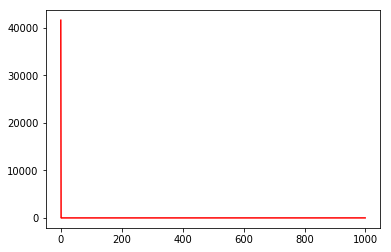

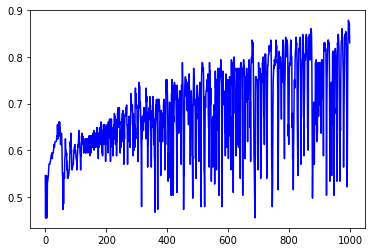

Test Accuracy:  0.54761904
MSE: 4.1082


In [54]:

# Calculte the cost and accuracy of each epoch
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
	sess.run(training_step, feed_dict = {x: train_x, y_: train_y})
	cost = sess.run(cost_function, feed_dict = {x: train_x, y_: train_y})
	cost_history = np.append(cost_history, cost)
	correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1)) #Difference between the actual output and model outputs
	accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
	
	pred_y = sess.run(y, feed_dict = {x: test_x})
	mse = tf.reduce_mean(tf.square(pred_y - test_y)) #Mean square error
	mse_ = sess.run(mse)
	mse_history.append(mse_)
	accuracy = (sess.run(accuracy, feed_dict = {x: train_x, y_: train_y}))
	accuracy_history.append(accuracy)

	print("Epoch : ", epoch, " - Cost:", cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)

save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)


# Plot mse and accuracy grapth
plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history, 'b')
plt.show()

# Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict = {x: test_x, y_: test_y})))

# Print the final mean square error
pred_y = sess.run(y, feed_dict = {x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))